In [2]:
from  __future__ import print_function
import os
data_path=['Data']
print(data_path)

['Data']


In [3]:
import numpy as np
import pandas as pd
import os
filepath=os.sep.join(data_path+['Iris.csv'])
print(filepath)
data=pd.read_csv(filepath)
#data=pd.read_csv(filepath,index_col=0)
#data=pd.read_csv('Iris.csv')
print(data.head())

Data\Iris.csv
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
#Number of rows
print(data.shape[0])
#Show all columns
print(data.columns)

150
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
#Replacing "Iris-" to ""
data['Species']=data.Species.apply(lambda r:r.replace("Iris-",""))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
#Count Of each type of species
data.Species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [7]:
#to count median,mean,mode etc.
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#The mean Calculated
data.groupby('Species').median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
setosa,25.5,5.0,3.4,1.50,0.2
versicolor,75.5,5.9,2.8,4.35,1.3
virginica,125.5,6.5,3.0,5.55,2.0


In [9]:
#Calculating Mean Median
data.groupby("Species").agg(['mean','median'])

Id        SepalLengthCm        SepalWidthCm         \
             mean median          mean median         mean median   
Species                                                             
setosa       25.5   25.5         5.006    5.0        3.418    3.4   
versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
virginica   125.5  125.5         6.588    6.5        2.974    3.0   

           PetalLengthCm        PetalWidthCm         
                    mean median         mean median  
Species                                              
setosa             1.464   1.50        0.244    0.2  
versicolor         4.260   4.35        1.326    1.3  
virginica          5.552   5.55        2.026    2.0

In [10]:
#Printing Mean Median For All Fields And Max Petal Length
from pprint import pprint
agg_dict={field:['mean','median'] for field in data.columns if field !='Species'}
agg_dict['PetalLengthCm']='max'
pprint(agg_dict)
data.groupby('Species').agg(agg_dict)

{'Id': ['mean', 'median'],
 'PetalLengthCm': 'max',
 'PetalWidthCm': ['mean', 'median'],
 'SepalLengthCm': ['mean', 'median'],
 'SepalWidthCm': ['mean', 'median']}


Id        SepalLengthCm        SepalWidthCm         \
             mean median          mean median         mean median   
Species                                                             
setosa       25.5   25.5         5.006    5.0        3.418    3.4   
versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
virginica   125.5  125.5         6.588    6.5        2.974    3.0   

           PetalLengthCm PetalWidthCm         
                     max         mean median  
Species                                       
setosa               1.9        0.244    0.2  
versicolor           5.1        1.326    1.3  
virginica            6.9        2.026    2.0

[Text(0,0.5,'Sepal Width(cm)'),
 Text(0.5,0,'Sepal Length(cm)'),
 Text(0.5,1,'Sepal Length VS Width')]

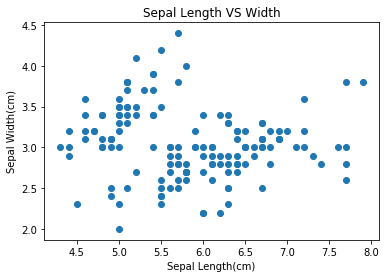

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.axes()
#PLot the Graph
ax.scatter(data.SepalLengthCm,data.SepalWidthCm)
#Label The graph
ax.set(xlabel='Sepal Length(cm)',
       ylabel='Sepal Width(cm)',
       title='Sepal Length VS Width')

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

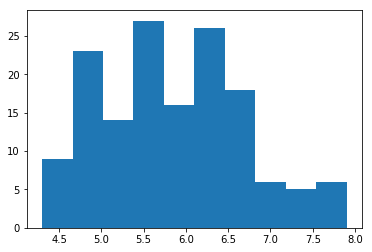

In [12]:
#Histogram
plt.hist(data.SepalLengthCm)

Text(0.5,0,'Size(cm)')

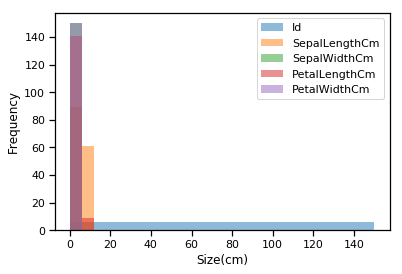

In [14]:
import seaborn as sns
sns.set_context('notebook')
ax=data.plot.hist(bins=25,alpha=0.5)
ax.set_xlabel('Size(cm)')

KeyError: 'dark'

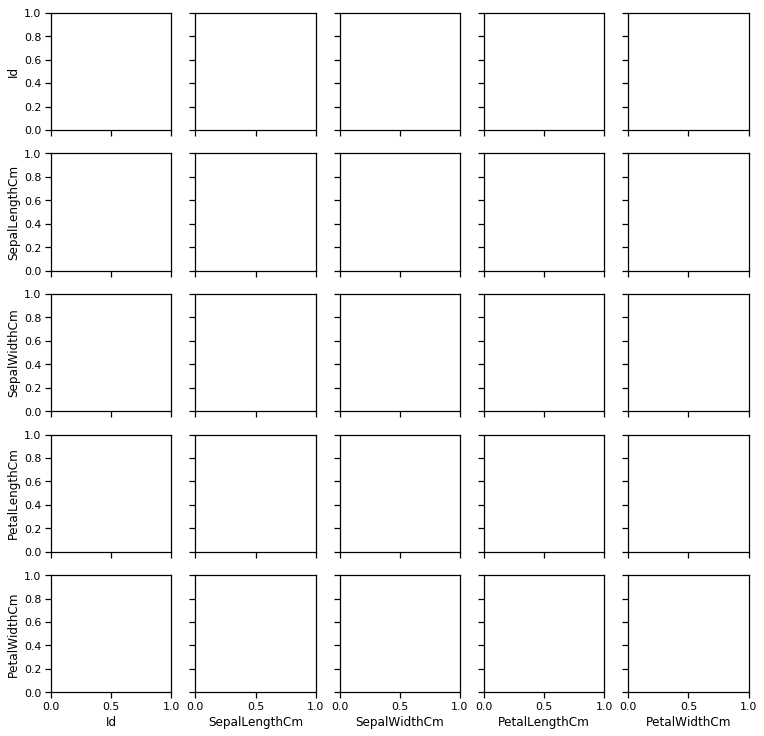

In [16]:
sns.pairplot(data,hue='dark')